<a href="https://www.kaggle.com/code/elhammahdian/classification-of-phone-datasetset?scriptVersionId=113943887" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier # or Decision Tree Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('/kaggle/input/phonedataset/train.csv')
df_train = pd.DataFrame(data_train)

In [3]:
data_test = pd.read_csv('/kaggle/input/phonedataset-test/test.csv')
df_test = pd.DataFrame(data_test)

# Preprocessing

In [4]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


At first we assess the range of the each features, mean, std for the undiscrite data in both datasets.

In [6]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

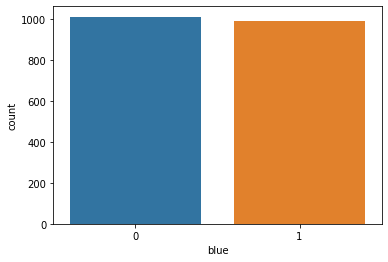

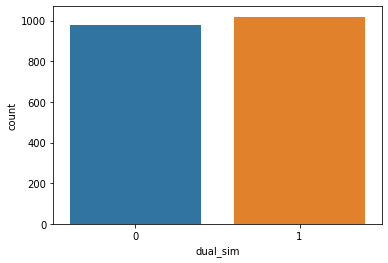

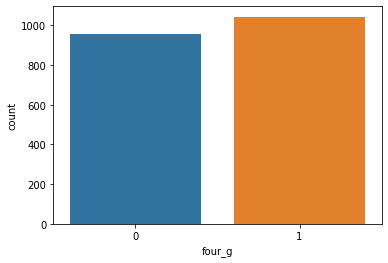

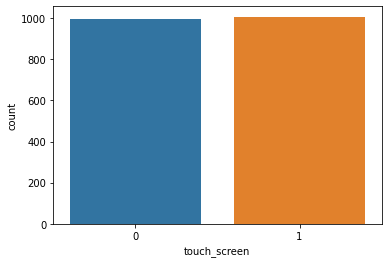

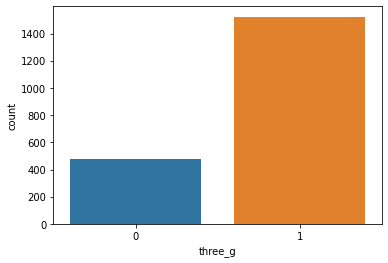

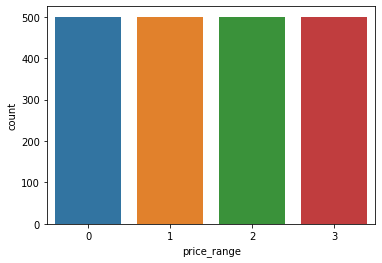

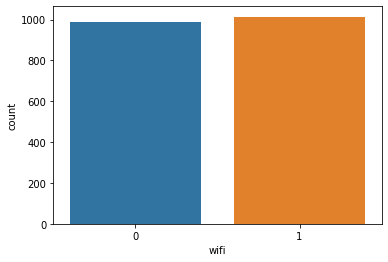

In [7]:
Categorical = ['blue','dual_sim', 'four_g', 'touch_screen', 'three_g', 'price_range', 'wifi']
i = 0
while i<8:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)                             # one row, 3 plots , first one
    sns.countplot(x = Categorical[i], data = df_train)   # read each one from Data
    i += 1
    if i==7:
        break
        plt.subplot(1,3,2) # one row,  second one
        sns.countplot(x = Categorical[i], data = df_train)   # read each one from Data
        i += 1
        plt.subplot(1,3,3)# one row,  Third one
        sns.countplot(x = Categorical[i], data = df_train)   # read each one from Data
        i += 1
        plt.show()


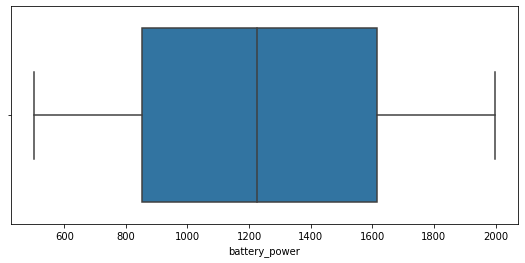

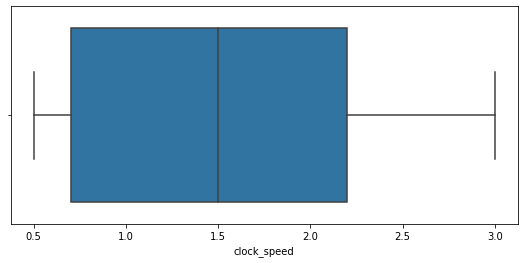

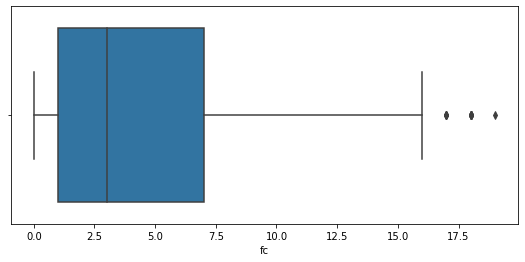

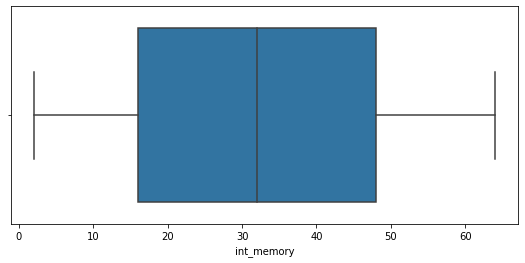

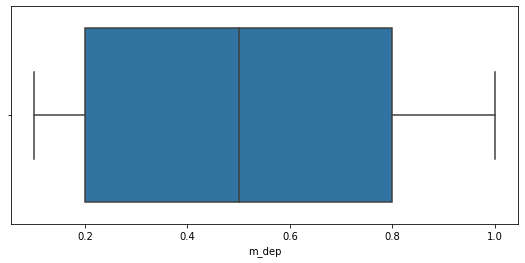

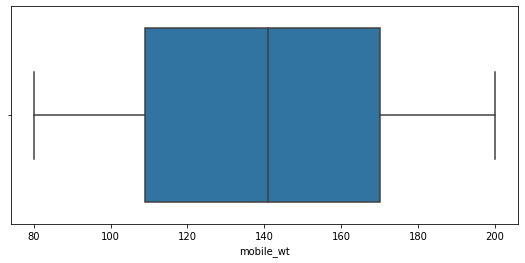

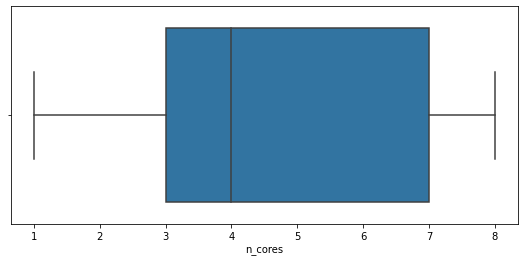

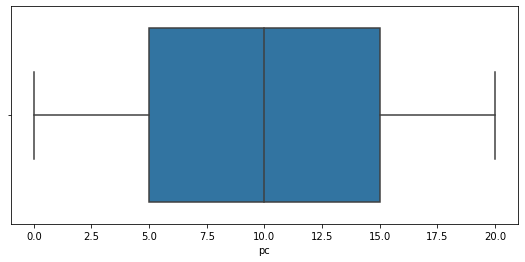

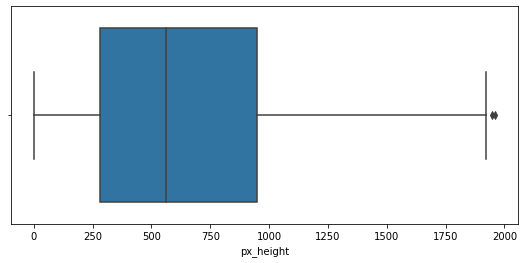

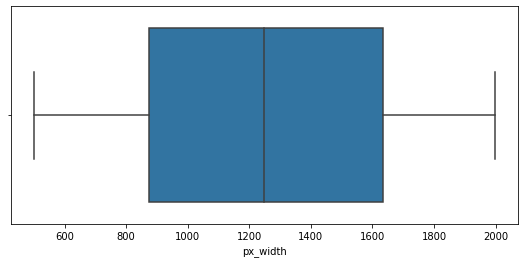

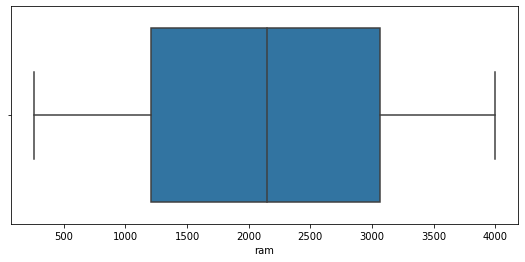

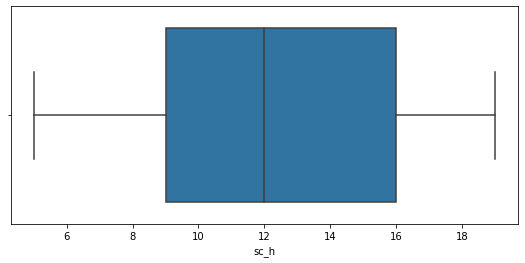

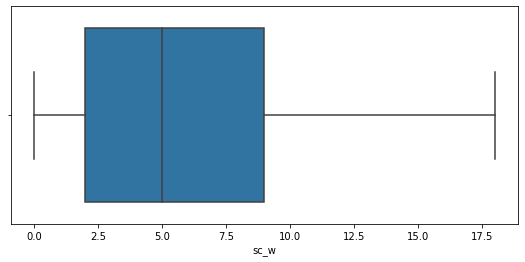

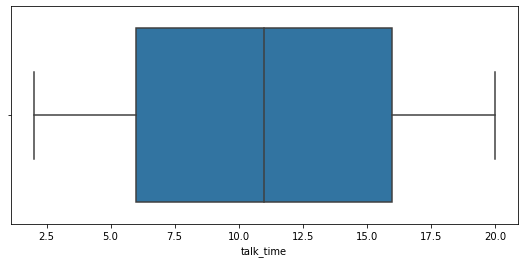

In [8]:
Numerical = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
i = 0
while i<15:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,2,1)                             # one row, 2 plots , first one
    sns.boxplot(x = Numerical[i], data = df_train)   # read each one from Data
    i += 1
    if i==14:
        break
        plt.subplot(1,2,2) # one row,  second one
        sns.boxplot(x = Numerical[i], data = df_train)   # read each one from Data
        i += 1
        plt.show()

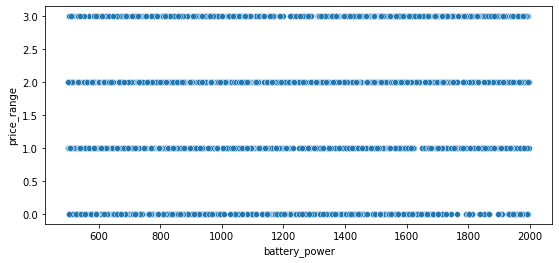

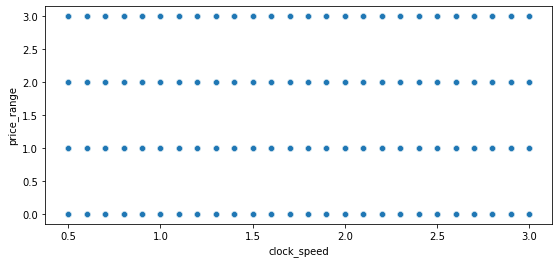

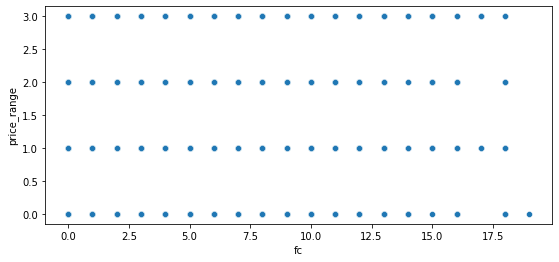

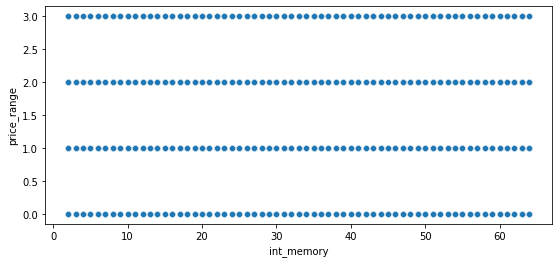

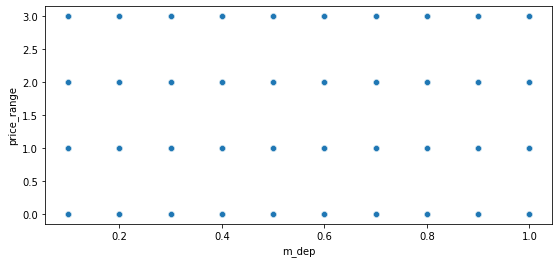

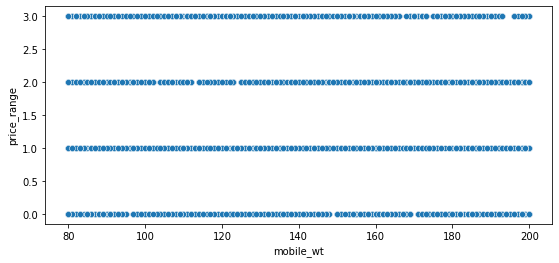

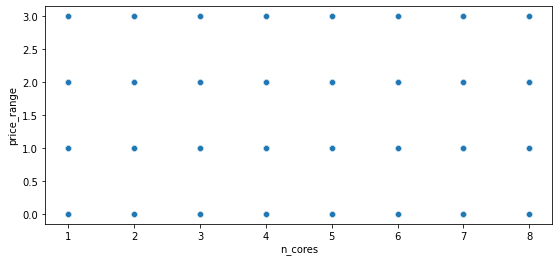

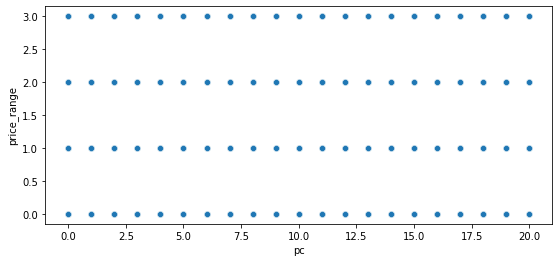

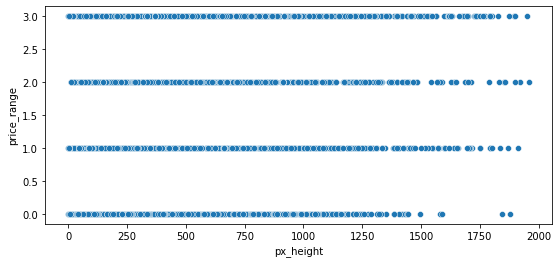

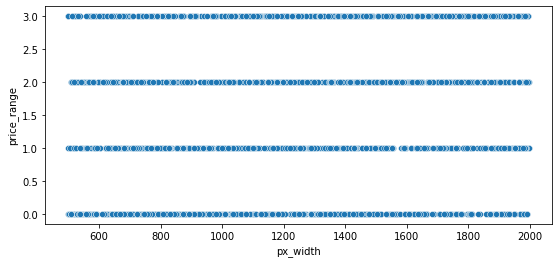

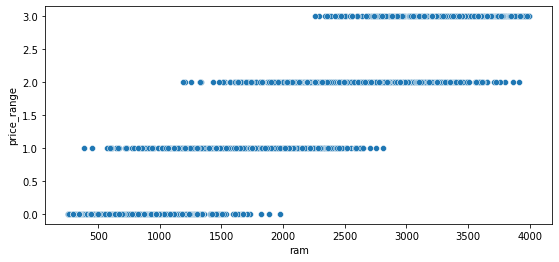

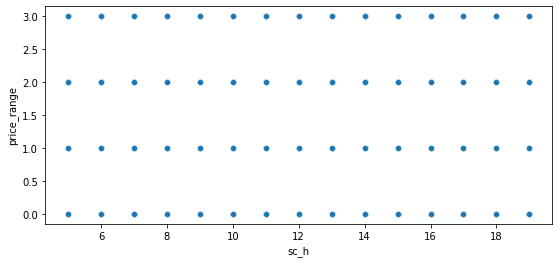

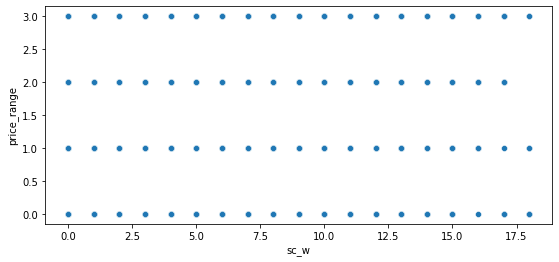

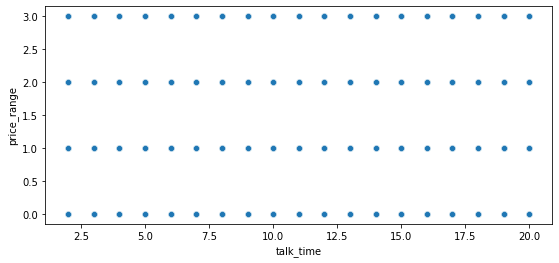

In [9]:
Numerical = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
i = 0
while i<15:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,2,1)                             # one row, 2 plots , first one
    sns.scatterplot(x = Numerical[i], y = 'price_range', data = df_train)   # read each one from Data
    i += 1
    if i==14:
        break
        plt.subplot(1,2,2) # one row,  second one
        sns.scatterplot(x = Numerical[i], y = 'price_range', data = df_train)   # read each one from Data
        i += 1
        plt.show()

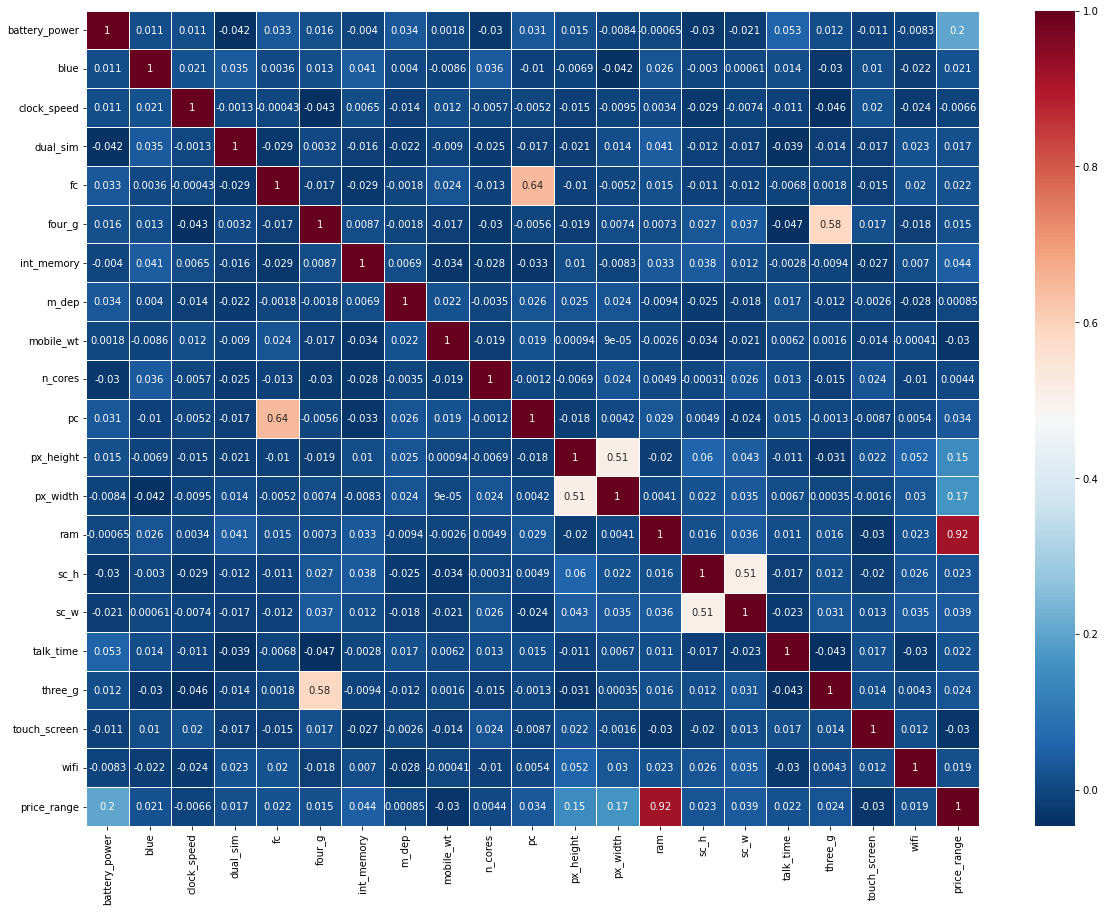

In [10]:
fig , ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_train.corr(), cmap = 'RdBu_r', cbar = True, annot = True, linewidth = .5 , ax = ax)
plt.show()

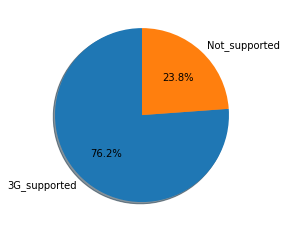

In [11]:
labels  = ['3G_supported', 'Not_supported']
values = df_train['three_g'].value_counts().values
fig1,ax1 = plt.subplots()
ax1.pie(values , labels = labels, autopct = '%1.1f%%', shadow = True , startangle = 90)
plt.show()

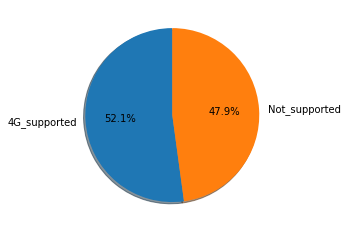

In [12]:
labels  = ['4G_supported', 'Not_supported']
values = df_train['four_g'].value_counts().values
fig1,ax1 = plt.subplots()
ax1.pie(values , labels = labels, autopct = '%1.1f%%', shadow = True , startangle = 90)
plt.show()

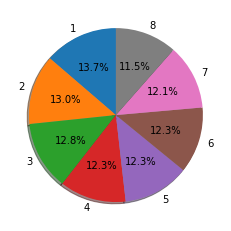

In [13]:
labels  = ['1', '2', '3', '4', '5', '6', '7', '8']
values = df_train['n_cores'].value_counts().values
fig1,ax1 = plt.subplots()
ax1.pie(values , labels = labels, autopct = '%1.1f%%', shadow = True , startangle = 90)
plt.show()

In [14]:
df = df_train[df_train['sc_w']>=2]
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1606,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1607,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1608,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [15]:
df_final = df[df['px_height']!=0]
df_final

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1606,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1607,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1608,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [16]:
df_final.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [17]:
df2 = df_test[df_test['sc_w']>=2]
df2.reset_index(inplace = True)
df2.drop('index', axis = 1, inplace = True)
df2

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
2,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
3,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
4,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,994,567,1,2.7,1,14,1,56,0.4,165,...,17,555,1290,336,7,6,7,1,1,1
785,995,936,1,1.4,1,0,0,46,0.8,139,...,0,265,886,684,8,5,12,1,1,1
786,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
787,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [18]:
df2.drop('id', axis = 1 , inplace = True)

In [19]:
df2_final = df2[df2['px_height']!=0]
df2_final

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
2,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
4,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,567,1,2.7,1,14,1,56,0.4,165,8,17,555,1290,336,7,6,7,1,1,1
785,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1
786,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
787,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [20]:
df2_final.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

# Decision Tree Classification

In [21]:
Xd = pd.DataFrame(df_final, columns=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
yd = df_final.price_range.values.reshape(-1,1)       

In [22]:
def DTs(Xd, yd, Testsize, mdepth):
    df_evaluation = pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split (Xd, yd, test_size = x , random_state =0)
        for maxdepth in mdepth:
            clf = DecisionTreeClassifier(max_depth = maxdepth)
            clf = clf.fit(X_train , y_train)
            y_pred = clf.predict(X_test)
            dict = {'Test_size':x , 'Max_depth':maxdepth, 'acc':metrics.accuracy_score(y_test , y_pred), 'score':clf.score(Xd, yd)}
            df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return (df_evaluation)
    
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [23]:
df_evaluation = DTs(Xd , yd ,[.1 , .15, .2 , .25 , .3] , range(1, 21))
df_evaluation.style.apply(highlight_max)


,Test_size,Max_depth,acc,score
0,0.100000,1.000000,0.521739,0.497203
1,0.100000,2.000000,0.776398,0.766314
2,0.100000,3.000000,0.788820,0.775637
3,0.100000,4.000000,0.838509,0.839030
4,0.100000,5.000000,0.819876,0.882536
5,0.100000,6.000000,0.826087,0.916097
6,0.100000,7.000000,0.826087,0.942200
7,0.100000,8.000000,0.850932,0.964574
8,0.100000,9.000000,0.850932,0.972032
9,0.100000,10.000000,0.869565,0.982598


In [24]:
X_train, X_test, y_train, y_test = train_test_split(Xd , yd, test_size = .1 , random_state = 0)

In [25]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 18)
clf = clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8509316770186336


# Random Forrest

In [26]:
Xr = pd.DataFrame(df_final, columns=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
yr = df_final.price_range.values.reshape(-1,1)       

In [27]:
def RF(Xr, yr, Testsize, mdepth):
    df_evaluation = pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split (Xr, yr, test_size = x , random_state =0)
        for maxdepth in mdepth:
            RF = RandomForestClassifier(max_depth = maxdepth, criterion = 'entropy')
            RF.fit(X_train , y_train)
            y_pred = RF.predict(X_test)
            dict = {'Test_size':x , 'Max_depth':maxdepth, 'acc':metrics.accuracy_score(y_test , y_pred), 'score':RF.score(Xr, yr)}
            df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return (df_evaluation)
    
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [28]:
df_evaluation = RF(Xr , yr ,[.1 , .15, .2 , .25 , .3] , range(9, 21))
df_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,acc,score
0,0.100000,9.000000,0.888199,0.987570
1,0.100000,10.000000,0.888199,0.988191
2,0.100000,11.000000,0.863354,0.986327
3,0.100000,12.000000,0.863354,0.986327
4,0.100000,13.000000,0.881988,0.988191
5,0.100000,14.000000,0.894410,0.989434
6,0.100000,15.000000,0.881988,0.988191
7,0.100000,16.000000,0.881988,0.988191
8,0.100000,17.000000,0.875776,0.987570
9,0.100000,18.000000,0.900621,0.990056


In [29]:
X_train, X_test, y_train, y_test = train_test_split(Xr , yr, test_size = .1 , random_state = 0)

In [30]:
RF = RandomForestClassifier(max_depth =14 , criterion = 'entropy')
RF.fit(X_train , y_train)
y_pred = RF.predict(X_test)

In [31]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8881987577639752


# SVM

In [32]:
Xs = pd.DataFrame(df_final, columns=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
ys = df_final.price_range.values.reshape(-1,1) 

In [33]:
def SVM(Xs , ys, Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(Xs , ys, test_size = x , random_state =0)
        svm = SVC(kernel='rbf')
        svm.fit(X_train , y_train)
        y_pred = svm.predict(X_test)
        dict = {'Testsize': x , 'acc': metrics.accuracy_score(y_test , y_pred), 'score': svm.score(Xs,ys)}
        df_evaluation = df_evaluation.append(dict , ignore_index = True)
    return (X_train, X_test, y_train, y_test, y_pred, df_evaluation)

# This function highlight the maximum values

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max] 

In [34]:
X_train, X_test, y_train, y_test, y_pred, df_evaluation = SVM(Xs , ys , [.1, .15 , .2, .25, .3])
df_evaluation.style.apply(highlight_max)

,Testsize,acc,score
0,0.100000,0.956522,0.954630
1,0.150000,0.958678,0.955873
2,0.200000,0.959627,0.955873
3,0.250000,0.952854,0.952766
4,0.300000,0.962733,0.954009


In [35]:
X_train, X_test, y_train, y_test = train_test_split(Xs , ys, test_size = .15 , random_state = 0)

In [36]:
svm = SVC(C = .75 , decision_function_shape = 'ovo', gamma = 'auto', kernel='rbf', random_state = 2)
svm.fit(X_train , y_train)
y_pred = svm.predict(X_test)

In [37]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25206611570247933


In [38]:
def SVM(Xs , ys, Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(Xs , ys, test_size = x , random_state =0)
        svm = SVC(kernel='linear')
        svm.fit(X_train , y_train)
        y_pred = svm.predict(X_test)
        dict = {'Testsize': x , 'acc': metrics.accuracy_score(y_test , y_pred), 'score': svm.score(Xs,ys)}
        df_evaluation = df_evaluation.append(dict , ignore_index = True)
    return (X_train, X_test, y_train, y_test, y_pred, df_evaluation)

# This function highlight the maximum values

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max] 

In [39]:
X_train, X_test, y_train, y_test, y_pred, df_evaluation = SVM(Xs , ys , [.1, .15 , .2, .25, .3])
df_evaluation.style.apply(highlight_max)

,Testsize,acc,score
0,0.100000,0.968944,0.989434
1,0.150000,0.975207,0.989434
2,0.200000,0.965839,0.990056
3,0.250000,0.965261,0.989434
4,0.300000,0.968944,0.988813


In [40]:
X_train, X_test, y_train, y_test = train_test_split(Xs , ys, test_size = .2 , random_state = 0)

In [41]:
svm = SVC(C = .75 , decision_function_shape = 'ovo', gamma = 'auto', kernel='linear', random_state = 2)
svm.fit(X_train , y_train)
y_pred = svm.predict(X_test)

In [42]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9658385093167702


In [43]:
def SVM(Xs , ys, Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(Xs , ys, test_size = x , random_state =0)
        svm = SVC(kernel='poly')
        svm.fit(X_train , y_train)
        y_pred = svm.predict(X_test)
        dict = {'Testsize': x , 'acc': metrics.accuracy_score(y_test , y_pred), 'score': svm.score(Xs,ys)}
        df_evaluation = df_evaluation.append(dict , ignore_index = True)
    return (X_train, X_test, y_train, y_test, y_pred, df_evaluation)

# This function highlight the maximum values

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max] 

In [44]:
X_train, X_test, y_train, y_test, y_pred, df_evaluation = SVM(Xs , ys , [.1, .15 , .2, .25, .3])
df_evaluation.style.apply(highlight_max)

,Testsize,acc,score
0,0.100000,0.962733,0.954630
1,0.150000,0.966942,0.956495
2,0.200000,0.953416,0.956495
3,0.250000,0.950372,0.958981
4,0.300000,0.962733,0.957738


In [45]:
X_train, X_test, y_train, y_test = train_test_split(Xs , ys, test_size = .25 , random_state = 0)

In [46]:
svm = SVC(C = .75 , decision_function_shape = 'ovo', gamma = 'auto', kernel='poly', random_state = 2)
svm.fit(X_train , y_train)
y_pred = svm.predict(X_test)

In [47]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9578163771712159


In [48]:
def SVM(Xs , ys, Testsize):
    df_evaluation = pd.DataFrame()
    for x in Testsize :
        X_train, X_test, y_train, y_test = train_test_split(Xs , ys, test_size = x , random_state =0)
        svm = SVC(kernel='sigmoid')
        svm.fit(X_train , y_train)
        y_pred = svm.predict(X_test)
        dict = {'Testsize': x , 'acc': metrics.accuracy_score(y_test , y_pred), 'score': svm.score(Xs,ys)}
        df_evaluation = df_evaluation.append(dict , ignore_index = True)
    return (X_train, X_test, y_train, y_test, y_pred, df_evaluation)

# This function highlight the maximum values

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max] 

In [49]:
X_train, X_test, y_train, y_test, y_pred, df_evaluation = SVM(Xs , ys , [.1, .15 , .2, .25, .3])
df_evaluation.style.apply(highlight_max)

,Testsize,acc,score
0,0.100000,0.192547,0.185208
1,0.150000,0.185950,0.188937
2,0.200000,0.183230,0.197638
3,0.250000,0.183623,0.201367
4,0.300000,0.190476,0.202610


# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
Xk = pd.DataFrame(df_final, columns=['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'])
yk = df_final.price_range.values.reshape(-1,1) 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(Xk , yk, test_size = .2 , random_state =0)

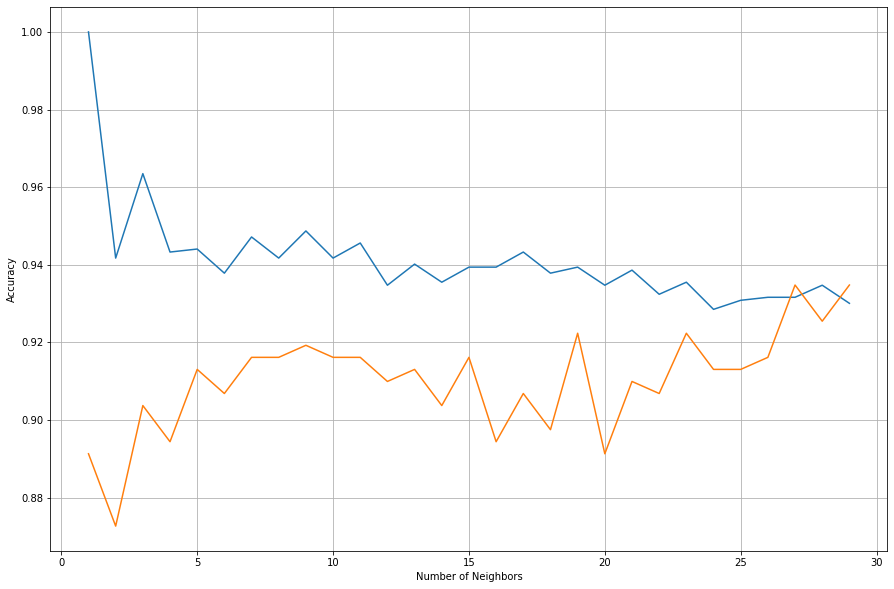

In [53]:
training_acc = []
test_acc = []
neighbors_setting = range(1, 30)
for n_neighbors in neighbors_setting:
    knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn_model.fit(X_train , y_train.ravel())
    training_acc.append(knn_model.score(X_train , y_train))
    test_acc.append(knn_model.score(X_test , y_test))
    

    
plt.figure(figsize= (15,10))
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of training set' )
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of test set' )
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
    

In [54]:
print(np.max(training_acc))
print(np.max(test_acc))

1.0
0.9347826086956522


In [55]:
knn_model= KNeighborsClassifier(9)
knn_model.fit(X_train , y_train.ravel())
y_pred = knn_model.predict(X_test)
print('Accuracy of knn:', metrics.accuracy_score(y_test , y_pred))

Accuracy of knn: 0.9192546583850931


In [56]:
knn_model= KNeighborsClassifier(19)
knn_model.fit(X_train , y_train.ravel())
y_pred = knn_model.predict(X_test)
print('Accuracy of knn:', metrics.accuracy_score(y_test , y_pred))

Accuracy of knn: 0.922360248447205


Based on the results of DTs, RF, KNN ,and SVM for different Kernel, test_siza and max_depth the SVM with the linear kernel has the highest accuracy. Therefore, we choos to make our model based on this algoritm and predict the labels of out test dataset.

# Test 

In [57]:
y_test_pred = svm.predict(df2_final)
y_test_pred

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 1, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 3, 3, 0, 2, 1, 2, 1, 2, 2, 3, 0, 0, 2, 0, 3, 3, 0, 3, 0, 3,
       1, 3, 1, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 2, 3, 3, 3,
       2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 0, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 3, 3, 2, 3, 2,
       3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 3, 1,
       3, 1, 2, 3, 3, 1, 0, 0, 3, 1, 1, 3, 2, 0, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 2,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 1, 0, 3, 1, 1, 3, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 1, 2, 3,

In [58]:
df2_final['price_range'] = y_test_pred
df2_final

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
2,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,567,1,2.7,1,14,1,56,0.4,165,8,...,555,1290,336,7,6,7,1,1,1,0
785,936,1,1.4,1,0,0,46,0.8,139,2,...,265,886,684,8,5,12,1,1,1,0
786,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
787,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
